In [130]:
import torch
import torch.nn as nn
import numpy as np

In [131]:
data = np.genfromtxt('iris_2D_demo.csv', delimiter=',', skip_header=1)
X = torch.from_numpy(data[:, 0:2]).float()
y = torch.from_numpy(data[:, 2:]).float()

print(X)
print(y)

tensor([[1.4000, 0.2000],
        [1.5000, 0.2000],
        [3.0000, 1.1000],
        [4.1000, 1.3000]])
tensor([[0.],
        [0.],
        [1.],
        [1.]])


In [132]:
linear = nn.Linear(2,1)

#set weight
linear.weight.data = torch.Tensor([[0.5, -0.1]])
linear.bias.data = torch.Tensor([0.1])

print(linear.weight.shape)
print(linear.bias.shape)

torch.Size([1, 2])
torch.Size([1])


# Using nn.CrossEntropyLoss with PyTorch

In [133]:
linear = nn.Linear(2,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(), 
                            lr =0.1)
epochs = 2000

losses = []
for epoch in range(epochs):
    y_hat = torch.sigmoid(linear(X))

    #loss
    loss = loss_fn(y_hat, y)
    losses.append(loss.item())

    # compute gradient
    optimizer.zero_grad()
    loss.backward()

    #update weight
    optimizer.step()


Visualize

tensor([[1.5549, 4.5109]])
tensor([-6.3633])


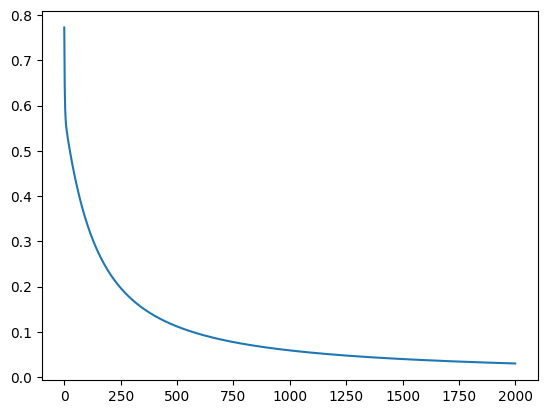

In [134]:
import matplotlib.pyplot as plt
plt.plot(losses)
print(linear.weight.data)
print(linear.bias.data)

In [135]:
z = linear(X)
y_hat = nn.Sigmoid()(z)
print(y_hat)

# compute accuracy using y and y_hat
y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == y).float().mean()
print(acc)

tensor([[0.0361],
        [0.0419],
        [0.9632],
        [0.9972]], grad_fn=<SigmoidBackward0>)
tensor(1.)


# Using nn.BCEWithLogitsLoss (sigmoid + BCE loss) with PyTorch

In [136]:
linear = nn.Linear(2,1)
#set weight
linear.weight.data = torch.Tensor([[0.5, -0.1]])
linear.bias.data = torch.Tensor([0.1])

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr= 0.1)
epochs = 2000

losses = []
for epoch in range(epochs):
    z = linear(X)

    loss = loss_fn(z, y)
    losses.append(loss.item())

    #compute gradient
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()

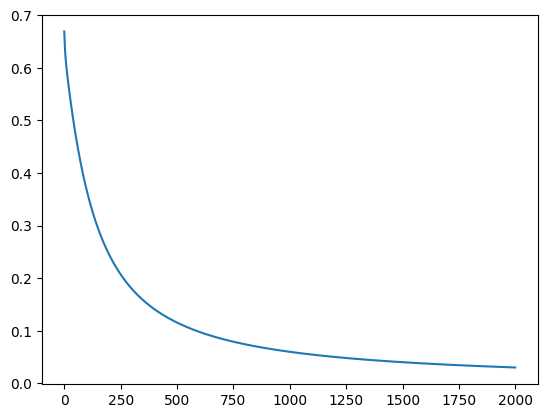

In [137]:
plt.plot(losses)

In [138]:
z = linear(X)
y_hat = nn.Sigmoid()(z)

y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == y).float().mean()
print(acc)

tensor(1.)
